# Isochrones and insolation: Reinflation

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as const

%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt

In [2]:
R_star = 2.546 * u.Rsun
M_star = 1.642 * u.Msun
a_by_R_star = 5.691 
a_AU = (a_by_R_star * R_star).to(u.AU)
m_planet = (0.34 * u.Mjup).to(u.Msun)

In [3]:
R_planet = 2.085 * u.R_jup

In [4]:
r_Hill = a_AU * (m_planet/(3*M_star))**(1/3)

In [5]:
rH_by_Rp = (r_Hill/R_planet).to(u.dimensionless_unscaled)
rH_by_a = (r_Hill/a_AU).to(u.dimensionless_unscaled)

In [6]:
rH_by_Rp, rH_by_a

(<Quantity 2.73132421>, <Quantity 0.04038943>)

So the Hill radius is $\sim$2.7 planetary radii, which is about 4% of the way towards the star.

In [7]:
star_to_planet_radius_ratio = (R_star/R_planet).to(u.dimensionless_unscaled)

### Import isochrones

In [8]:
from isochrones.mist import MISTIsochroneGrid

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


In [9]:
grid = MISTIsochroneGrid()
print(len(grid.df))
grid.df.head()  # Just the first few rows

1494453


eep  age       feh      mass  initial_mass  \
log10_isochrone_age_yr feh  EEP                                               
5.0                    -4.0 35    35  5.0 -3.978406  0.100000      0.100000   
                            36    36  5.0 -3.978406  0.102885      0.102885   
                            37    37  5.0 -3.978406  0.107147      0.107147   
                            38    38  5.0 -3.978406  0.111379      0.111379   
                            39    39  5.0 -3.978406  0.115581      0.115581   

                                   radius   density   logTeff         Teff  \
log10_isochrone_age_yr feh  EEP                                              
5.0                    -4.0 35   1.106082  0.104181  3.617011  4140.105252   
                            36   1.122675  0.102504  3.618039  4149.909661   
                            37   1.147702  0.099918  3.619556  4164.436984   
                            38   1.173015  0.097284  3.621062  4178.903372   
                            39   1.198615  0.094623  3.622555  4193.289262   

                                     logg      logL      Mbol   delta_nu  \
log10_isochrone_age_yr feh  EEP                                            
5.0                    -4.0 35   3.350571 -0.489734  5.964335  37.987066   
                            36   3.347798 -0.472691  5.921728  37.739176   
                            37   3.343658 -0.447471  5.858678  37.345115   
                            38   3.339612 -0.422498  5.796244  36.923615   
                            39   3.335660 -0.397776  5.734440  36.473151   

                                     nu_max  phase   dm_deep  
log10_isochrone_age_yr feh  EEP                               
5.0                    -4.0 35   299.346079   -1.0  0.002885  
                            36   298.570836   -1.0  0.003573  
                            37   297.180748   -1.0  0.004247  
                            38   295.526946   -1.0  0.004217  
                            39   293.589960   -1.0  0.004189

In [10]:
from isochrones.mist import MISTEvolutionTrackGrid

grid_tracks = MISTEvolutionTrackGrid()
print(len(grid_tracks.df))
grid_tracks.df.head()

3619652


nu_max    radius         Teff      logg  \
initial_feh initial_mass EEP                                                
-4.0        0.1          1    143.524548  1.593804  4176.707371  3.033277   
                         2    145.419039  1.583455  4176.085183  3.038935   
                         3    147.409881  1.572790  4175.435381  3.044805   
                         4    149.499346  1.561817  4174.757681  3.050886   
                         5    151.703570  1.550499  4174.049081  3.057203   

                                  logL   logTeff   delta_nu       feh  mass  \
initial_feh initial_mass EEP                                                  
-4.0        0.1          1   -0.157148  3.620834  21.776686 -3.978406   0.1   
                         2   -0.163066  3.620769  21.993078 -3.978406   0.1   
                         3   -0.169206  3.620702  22.219791 -3.978406   0.1   
                         4   -0.175569  3.620631  22.457004 -3.978406   0.1   
                         5   -0.182181  3.620558  22.706349 -3.978406   0.1   

                              initial_mass   density  phase  eep      Mbol  \
initial_feh initial_mass EEP                                                 
-4.0        0.1          1             0.1  0.034821   -1.0  1.0  5.132871   
                         2             0.1  0.035509   -1.0  2.0  5.147664   
                         3             0.1  0.036236   -1.0  3.0  5.163015   
                         4             0.1  0.037005   -1.0  4.0  5.178922   
                         5             0.1  0.037821   -1.0  5.0  5.195452   

                              interpolated      star_age       age   dt_deep  
initial_feh initial_mass EEP                                                  
-4.0        0.1          1           False  13343.289397  4.125263  0.026168  
                         2           False  14171.978264  4.151430  0.026121  
                         3           False  15048.910447  4.177505  0.026016  
                         4           False  15975.827275  4.203463  0.025996  
                         5           False  16962.744747  4.229496  0.025996

In [11]:
df_isomass = grid_tracks.df.loc[(0, 1.54)]
df_isomass1p8 = grid_tracks.df.loc[(0, 1.64)]

In [12]:
import seaborn as sns

In [13]:
sns.set_context('paper', font_scale=1.2)

# Geneva tracks

In [14]:
#! mv /Users/mag3842/Downloads/tables.dat ../../data/literature/Ekstrom2012/

In [15]:
import pandas as pd

In [16]:
names = ['Mini','Zini','Rot','Line','Time','Mass','logL','logTe','X','Y',
         'C12','C13','N14','O16','O17','O18','Ne20','Ne22','Al26','QCC',
         'logTe.u','logdM/dt','log(rhoc)','logTc','Xc','Yc','C12c','C13c',
         'N14c','O16c','O17c','O18c','Ne20c','Ne22c','Al26c','Omegas',
         'Omegac','oblat','dM/dtR','vcrit1','vcrit2','veq','OOc','Gedd','dM/dtm','Ltot',]

In [17]:
df_geneva = pd.read_csv('../../data/literature/Ekstrom2012/tables.dat', delim_whitespace=True, names=names)

In [18]:
df_geneva['Teff'] = 10**df_geneva.logTe

In [19]:
mask = (df_geneva.Mini==1.5) & (df_geneva.Rot=='r')
df_gen1p5 = df_geneva[mask].reset_index(drop=True)
mask = (df_geneva.Mini==1.7) & (df_geneva.Rot=='r')
df_gen1p5r = df_geneva[mask].reset_index(drop=True)

In [20]:
df_gen1p5.Time.min()

15970696.0

In [21]:
mask = (df_isomass.star_age>df_gen1p5.Time.min()) #& (df_isomass.star_age<df_gen1p5.Time.max())
df_isomass = df_isomass[mask]

mask = (df_isomass1p8.star_age>df_gen1p5.Time.min()) #& (df_isomass1p8.star_age<df_gen1p5.Time.max())
df_isomass1p8 = df_isomass1p8[mask]

In [22]:
checks = np.array([1.5e9, 1.8e9, 2.2e9, 2.3e9])[:,np.newaxis]
checks2 = np.array([1.4e9, 1.8e9, 1.845e9, 1.88e9, 1.9e9])[:,np.newaxis]
indices = np.argmin(np.abs(df_isomass.star_age.values-checks), axis=1)
indices2 = np.argmin(np.abs(df_isomass1p8.star_age.values-checks2), axis=1)

In [23]:
pal = sns.color_palette("rocket", n_colors=len(indices), as_cmap=False)
pal2 = sns.color_palette("mako", n_colors=len(indices2), as_cmap=False)

In [24]:
times = [str(check) for check in checks.squeeze()/1e9]
times2 = [str(check) for check in checks2.squeeze()/1e9]

In [25]:
times, times2

(['1.5', '1.8', '2.2', '2.3'], ['1.4', '1.8', '1.845', '1.88', '1.9'])

## One panel

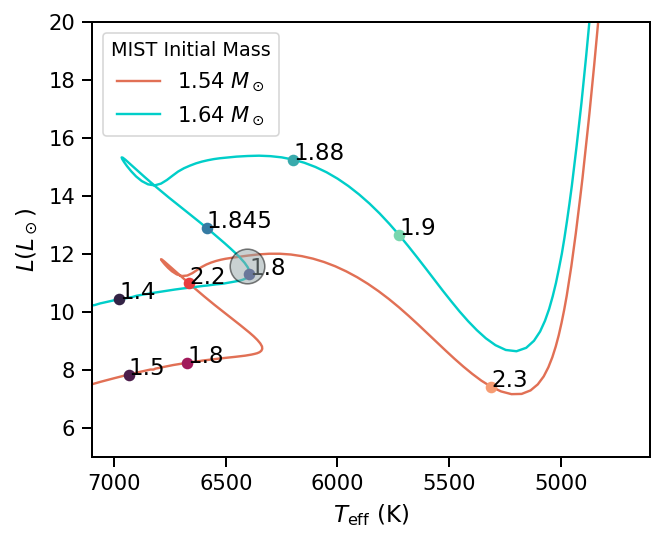

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True, sharex=False)

ax.plot(df_isomass.Teff, 10**df_isomass.logL,c='#e17055', label='1.54 $M_\odot$');
ax.plot(df_isomass1p8.Teff, 10**df_isomass1p8.logL,c='#00cec9', label='1.64 $M_\odot$');
for i, index in enumerate(indices):
    ax.plot(df_isomass.Teff.iloc[index], 10**df_isomass.logL.iloc[index], 'o', color=pal[i])
    ax.text(df_isomass.Teff.iloc[index], 10**df_isomass.logL.iloc[index], times[i])
for i, index in enumerate(indices2):
    ax.plot(df_isomass1p8.Teff.iloc[index], 10**df_isomass1p8.logL.iloc[index], 'o', color=pal2[i])
    ax.text(df_isomass1p8.Teff.iloc[index], 10**df_isomass1p8.logL.iloc[index], times2[i])
ax.scatter([6406], [11.6], marker='o', color='#95a5a6', zorder=12, s=300,ec='k', alpha=0.5)

ax.set_xlim(7100, 4600)
ax.set_ylim(5, 20)
ax.set_xticks([7000, 6500, 6000, 5500, 5000])
ax.set_xlabel('$T_\mathrm{eff}$ (K)')
ax.legend(title='MIST Initial Mass')
ax.set_ylabel('$L (L_\odot)$')

plt.xlabel('$T_\mathrm{eff}$ (K)')
plt.yscale('linear')
plt.savefig('../../paper/paper1/figures/MIST_only_HATP.png', dpi=300, bbox_inches='tight')

## Two panel

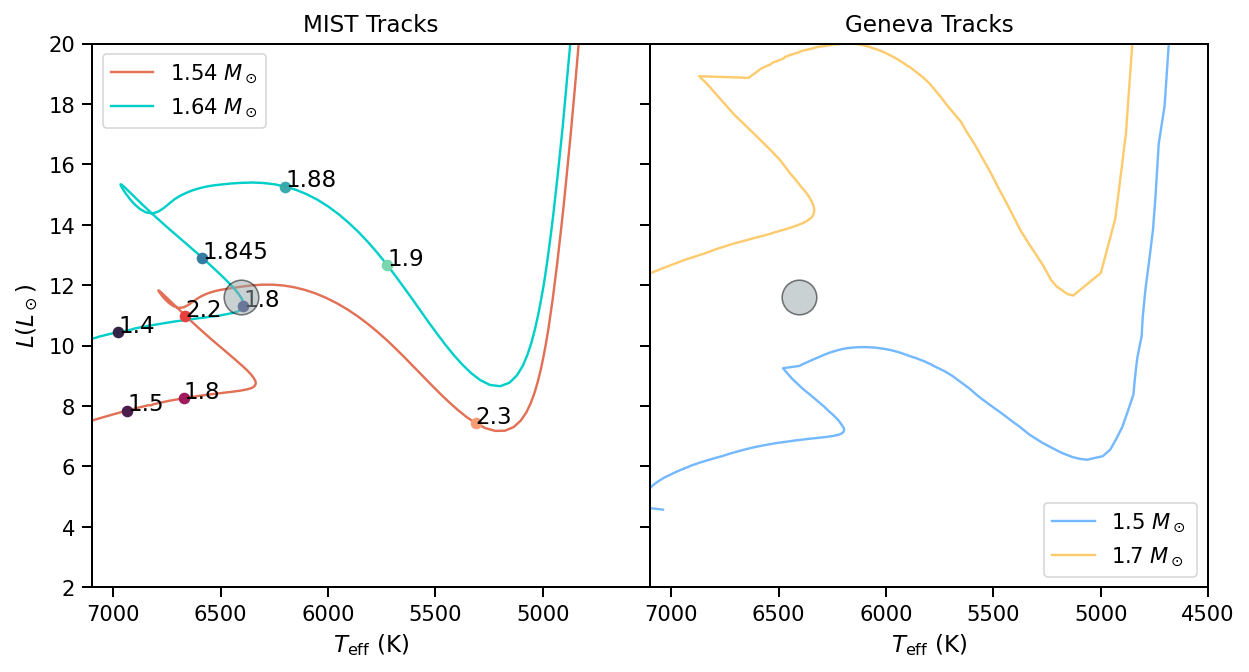

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=False)

axes[0].plot(df_isomass.Teff, 10**df_isomass.logL,c='#e17055', label='1.54 $M_\odot$');
axes[0].plot(df_isomass1p8.Teff, 10**df_isomass1p8.logL,c='#00cec9', label='1.64 $M_\odot$');
for i, index in enumerate(indices):
    axes[0].plot(df_isomass.Teff.iloc[index], 10**df_isomass.logL.iloc[index], 'o', color=pal[i])
    axes[0].text(df_isomass.Teff.iloc[index], 10**df_isomass.logL.iloc[index], times[i])
for i, index in enumerate(indices2):
    axes[0].plot(df_isomass1p8.Teff.iloc[index], 10**df_isomass1p8.logL.iloc[index], 'o', color=pal2[i])
    axes[0].text(df_isomass1p8.Teff.iloc[index], 10**df_isomass1p8.logL.iloc[index], times2[i])
axes[0].scatter([6406], [11.6], marker='o', color='#95a5a6', zorder=12, s=300,ec='k', alpha=0.5)

axes[0].set_xlim(7100, 4500)
axes[0].set_ylim(2, 20)
axes[0].set_xticks([7000, 6500, 6000, 5500, 5000])
axes[0].set_xlabel('$T_\mathrm{eff}$ (K)')
axes[0].set_title('MIST Tracks')
axes[0].legend()
axes[0].set_ylabel('$L (L_\odot)$')

axes[1].plot(df_gen1p5.Teff, 10**df_gen1p5.logL, color='#74b9ff', label='1.5 $M_\odot$')
axes[1].plot(df_gen1p5r.Teff, 10**df_gen1p5r.logL, color='#fdcb6e', label='1.7 $M_\odot$ ')
axes[1].scatter([6406], [11.6], marker='o', color='#95a5a6', zorder=12, s=300,ec='k', alpha=0.5)

axes[1].set_xlim(7100, 4500)
axes[1].set_ylim(2, 20)
axes[1].set_title('Geneva Tracks')
axes[1].legend()
axes[1].set_yticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)

plt.xlabel('$T_\mathrm{eff}$ (K)')
plt.yscale('linear')
plt.savefig('../../paper/paper1/figures/MIST_tracks_HATP.png', dpi=300, bbox_inches='tight')

In [28]:
df_isomass

,nu_max,radius,Teff,logg,logL,logTeff,delta_nu,feh,mass,initial_mass,density,phase,eep,Mbol,interpolated,star_age,age,dt_deep
EEP,,,,,,,,,,,,,,,,,,
202,1.825420e+03,1.522199,7359.582042,4.260723,0.787001,3.866853,85.899392,0.042064,1.539994,1.54,0.615540,0.0,202.0,2.772498,False,1.666125e+07,7.221708,0.015986
203,1.866026e+03,1.503432,7401.158995,4.271498,0.786012,3.869300,87.322378,0.042042,1.539994,1.54,0.638880,0.0,203.0,2.774970,False,1.714236e+07,7.234071,0.012490
204,1.907169e+03,1.486016,7423.302192,4.281618,0.781081,3.870597,88.740533,0.042017,1.539994,1.54,0.661606,0.0,204.0,2.787297,False,1.764768e+07,7.246688,0.012646
205,1.942277e+03,1.472154,7430.796883,4.289759,0.774694,3.871035,89.929702,0.041990,1.539994,1.54,0.680473,0.0,205.0,2.803266,False,1.817030e+07,7.259362,0.012696
206,1.968601e+03,1.462269,7430.928582,4.295611,0.768872,3.871043,90.809966,0.041962,1.539994,1.54,0.694366,0.0,206.0,2.817819,False,1.871029e+07,7.272081,0.012761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,1.629311e+06,0.018529,57376.555529,7.657291,0.525287,4.758734,34382.699478,0.057710,0.568655,1.54,126021.441266,6.0,1706.0,3.426782,False,2.684751e+09,9.428904,0.000009
1707,1.659285e+06,0.018417,56676.279095,7.662545,0.498701,4.753401,34701.669954,0.057710,0.568655,1.54,128329.086380,6.0,1707.0,3.493248,False,2.684807e+09,9.428913,0.000009
1708,1.689405e+06,0.018309,55982.469479,7.667683,0.472166,4.748052,35017.072731,0.057710,0.568655,1.54,130626.608721,6.0,1708.0,3.559585,False,2.684864e+09,9.428922,0.000009


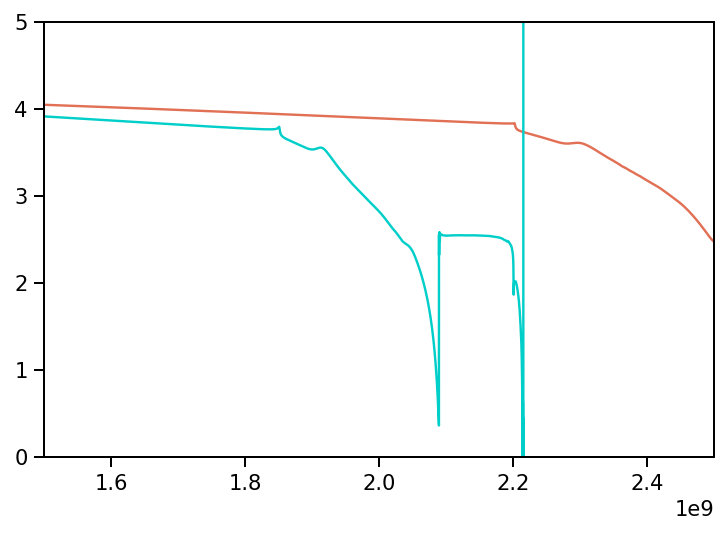

In [29]:
plt.plot(df_isomass.star_age, df_isomass.logg, color='#e17055')
plt.plot(df_isomass1p8.star_age, df_isomass1p8.logg, color='#00cec9')
#plt.plot(df_gen1p5.Time, 10**df_gen1p5.logL, color='#74b9ff')
#plt.plot(df_gen1p5r.Time, 10**df_gen1p5r.logL, color='#fdcb6e')
#plt.axhline(11.6, color='k', linestyle='dashed')
plt.ylim(0, 5)

plt.xlim(1.5e9, 2.5e9)
plt.yscale('linear')

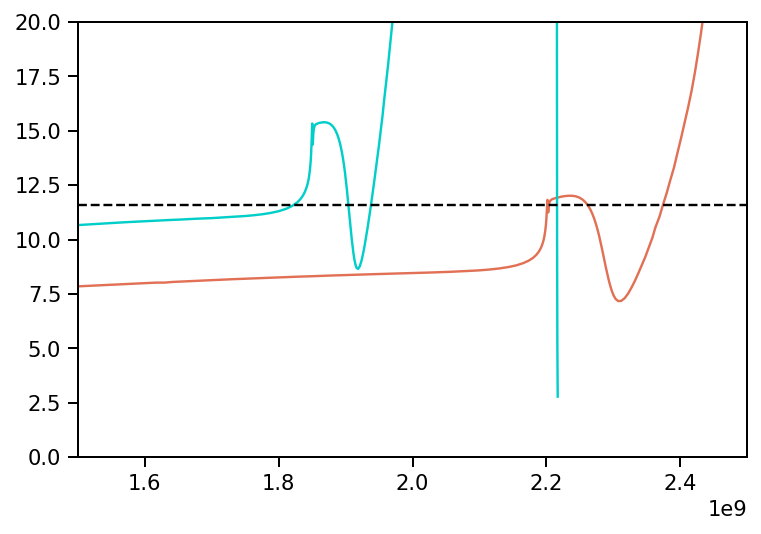

In [30]:
plt.plot(df_isomass.star_age, 10**df_isomass.logL, color='#e17055')
plt.plot(df_isomass1p8.star_age, 10**df_isomass1p8.logL, color='#00cec9')
#plt.plot(df_gen1p5.Time, 10**df_gen1p5.logL, color='#74b9ff')
#plt.plot(df_gen1p5r.Time, 10**df_gen1p5r.logL, color='#fdcb6e')
plt.axhline(11.6, color='k', linestyle='dashed')
plt.ylim(0, 20)
plt.xlim(1.5e9, 2.5e9)
plt.yscale('linear')

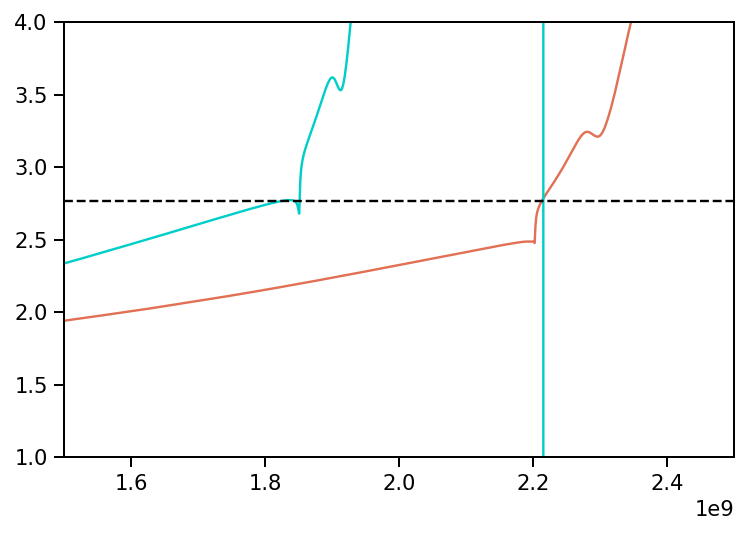

In [31]:
plt.plot(df_isomass.star_age, df_isomass.radius, color='#e17055')
plt.plot(df_isomass1p8.star_age, df_isomass1p8.radius, color='#00cec9')
#plt.plot(df_gen1p5.Time, 10**df_gen1p5.logL, color='#74b9ff')
#plt.plot(df_gen1p5r.Time, 10**df_gen1p5r.logL, color='#fdcb6e')
plt.axhline(R_star.value*1.087, color='k', linestyle='dashed')
plt.ylim(1, 4)
plt.xlim(1.5e9, 2.5e9)
plt.yscale('linear')

### Plot the $T_{eq}$ for the planet over time.

In [32]:
const.sigma_sb

<<class 'astropy.constants.codata2018.CODATA2018'> name='Stefan-Boltzmann constant' value=5.6703744191844314e-08 uncertainty=0.0 unit='W / (K4 m2)' reference='CODATA 2018'>

In [33]:
def teq(I_0):
    '''Compute the equilibrium temperature as a function of input flux, in W/m^2'''
    out = (I_0/(4*const.sigma_sb))**0.25
    return out

In [34]:
eps_0 = 2.37
F_0 = 0.14
ess = 0.37

def epsilon_g(F_planet):
    return eps_0 * np.exp(-1* (np.log10(F_planet) - F_0)**2 / (2*ess**2))

In [35]:
flux_at_planet = ((10**df_isomass.logL.values*u.Lsun)/(4*np.pi*a_AU**2)).to(u.Watt/u.m**2)

In [36]:
flux_at_planet2 = ((10**df_isomass1p8.logL.values*u.Lsun)/(4*np.pi*a_AU**2)).to(u.Watt/u.m**2)

In [37]:
teq_v_time = teq(flux_at_planet)
teq_v_time2 = teq(flux_at_planet2)

In [38]:
actual_teq = teq(((11.5*u.Lsun)/(4*np.pi*a_AU**2)).to(u.Watt/u.m**2))

In [39]:
actual_teq

<Quantity 1974.52460626 K>

In [40]:
ehat_g = epsilon_g(flux_at_planet.to(u.Gerg/u.s/u.cm**2).value)
ehat_g2 = epsilon_g(flux_at_planet2.to(u.Gerg/u.s/u.cm**2).value)

In [41]:
actual_ehat = epsilon_g(((11.5*u.Lsun)/(4*np.pi*a_AU**2)).to(u.Gerg/u.s/u.cm**2).value)

In [42]:
actual_ehat

1.3307462888004613

In [43]:
tau_infl = (1/ehat_g) * (0.34)**2 * (1/0.75)**3 * (1500/teq_v_time)**4 * 1000
tau_infl2 = (1/ehat_g2) * (0.34)**2 * (1/0.75)**3 * (1500/teq_v_time2)**4 * 1000

In [44]:
est_tau_infl = (1/actual_ehat) * (0.34)**2 * (1/(2.085*1.087))**3 * (1500/actual_teq.value)**4 * 1000

In [45]:
est_tau_infl

2.485252936018423

In [46]:
(1/3) * (0.5)**2 * (1/(2))**3 * (1500/1800)**4 

0.005023469650205762

Digitize plot data from Figure 5 of Batygin+ 2011

In [47]:
#! mv /Users/mag3842/Downloads/plot-data.csv ../../data/literature/Batygin2011/

In [48]:
df_bsb2011 = pd.read_csv('../../data/literature/Batygin2011/fig5_0p5Mj_Teff1800K.csv', 
                         names=['Age','Rp'], skiprows=1)

In [49]:
from scipy.interpolate import interp1d

In [50]:
interp_func = interp1d(df_bsb2011.Age, df_bsb2011.Rp, bounds_error=False)

In [51]:
R_p_of_t = interp_func(df_isomass.star_age.values)
R_p_of_t2 = interp_func(df_isomass1p8.star_age.values)

In [52]:
mask = R_p_of_t!=R_p_of_t
R_p_of_t[mask] = 0.87+1*np.exp(df_isomass.star_age.values[mask]/3e9)

mask = R_p_of_t2!=R_p_of_t2
R_p_of_t2[mask] = 0.87+1*np.exp(df_isomass1p8.star_age.values[mask]/3e9)

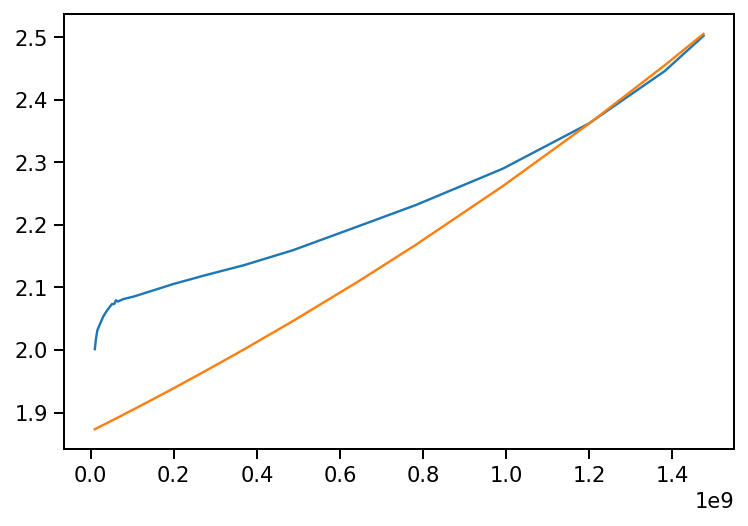

In [53]:
plt.plot(df_bsb2011.Age, df_bsb2011.Rp)
plt.plot(df_bsb2011.Age, 0.87+1*np.exp(df_bsb2011.Age/3e9))

In [54]:
tau_infl = (1/ehat_g) * (0.34)**2 * (1/R_p_of_t)**3 * (1500/teq_v_time)**4 * 1000
tau_infl2 = (1/ehat_g2) * (0.34)**2 * (1/R_p_of_t2)**3 * (1500/teq_v_time2)**4 * 1000

In [55]:
import matplotlib
matplotlib.font_manager._load_fontmanager(try_read_cache=False)

In [56]:
plt.rcParams['legend.title_fontsize'] = 'small'

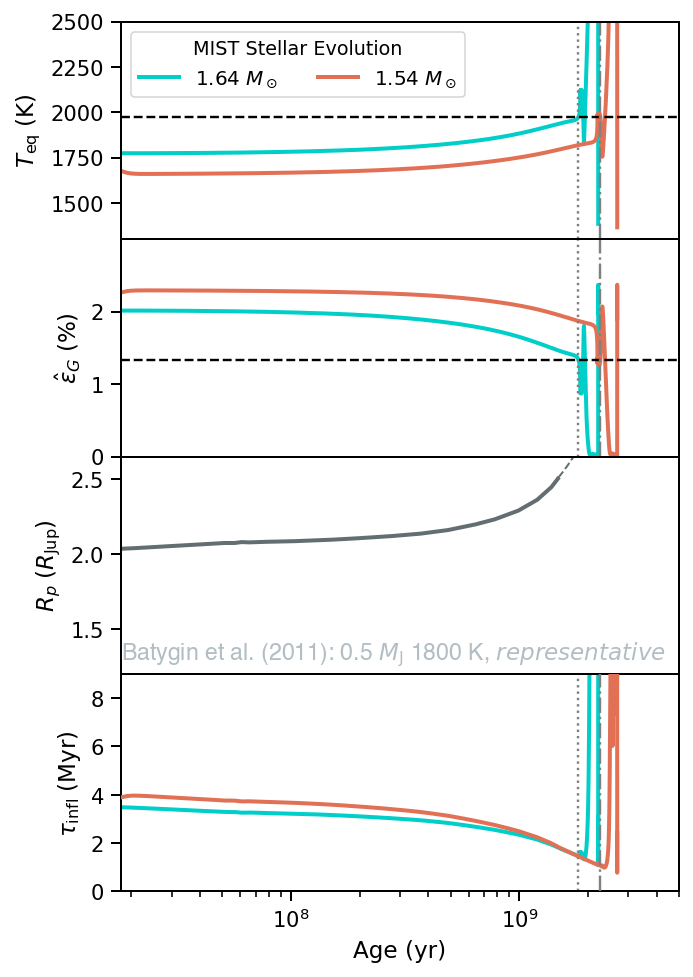

In [76]:
fig, axes = plt.subplots(4, 1, figsize=(5, 8), sharex=True)
axes[0].plot(df_isomass1p8.star_age, teq_v_time2, color='#00cec9', lw=2, label='1.64 $M_\odot$')
axes[0].plot(df_isomass.star_age, teq_v_time, color='#e17055', lw=2, label='1.54 $M_\odot$')
axes[0].axhline(actual_teq.value, linestyle='dashed', color='k')
axes[0].axvline(1.8*1e9, linestyle='dotted', color='gray')
axes[0].axvline(2.25*1e9, linestyle='dashdot', color='gray')
axes[0].set_ylim(1300, 2500)
axes[0].legend(ncol=2, title='MIST Stellar Evolution', fontsize=10, loc='upper left')
axes[0].set_ylabel('$T_\mathrm{eq}\;$(K)')

axes[1].plot(df_isomass1p8.star_age, ehat_g2, color='#00cec9', lw=2)
axes[1].plot(df_isomass.star_age, ehat_g, color='#e17055', lw=2)
axes[1].axhline(actual_ehat, linestyle='dashed', color='k')
axes[1].axvline(1.8*1e9, linestyle='dotted', color='gray')
axes[1].axvline(2.25*1e9, linestyle='dashdot', color='gray')
axes[1].set_ylabel('$\hat{\epsilon}_G\;(\%)$')
axes[1].set_ylim(0, 3)
axes[1].set_yticks([0, 1, 2])
#axes[1].set_xticks([])

axes[2].plot(df_bsb2011.Age, df_bsb2011.Rp, color='#636e72', lw=2)
axes[2].plot(df_isomass.star_age, R_p_of_t, color='#636e72', lw=1, linestyle='dashed')
axes[2].set_ylabel('$R_p\;(R_\mathrm{Jup})$')
axes[2].set_ylim(1.2, 2.65)
axes[2].text(1.8e7, 1.3, 'Batygin et al. (2011): 0.5 $M_\mathrm{J}$ 1800 K, $representative$', font='Helvetica', style='italic', color='#b2bec3')

axes[3].plot(df_isomass.star_age, tau_infl, color='#e17055', lw=2, zorder=10)
axes[3].plot(df_isomass1p8.star_age, tau_infl2, color='#00cec9', lw=2)
axes[3].axvline(1.8*1e9, linestyle='dotted', color='gray')
axes[3].axvline(2.25*1e9, linestyle='dashdot', color='gray', zorder=10)
axes[3].set_xlabel('Age (yr)')
axes[3].set_ylabel(r'$\tau_\mathrm{infl}\;$(Myr)')
axes[3].set_ylim(0, 9)
#axes[3].set_yticks([0, 50, 100, 150])
axes[3].set_xscale('log')
axes[3].set_xlim([1.8e7, 5e9])
plt.subplots_adjust(wspace=0, hspace=0.0)

plt.savefig('../../paper/paper1/figures/reinflation_MIST.png', 
            bbox_inches='tight', dpi=300)

## Plot the SED

Retrieve with VOSA

In [59]:
! head ../../data/VOSA/vosa_results_56265/56265.vosa.dat

# All data in vosa format
#
#                  Object                      RA                     DEC                  D (pc)                      Av                FilterID                Obs.Flux               Obs.Error             Point Props                         
#                   (---)                   (deg)                   (deg)                    (pc)                   (---)                   (---)           (erg/s/cm2/A)           (erg/s/cm2/A)                   (---)                   (---) 
#=================================================================================================================================================================================================================================================
                 HAT-P-67          256.6106700736       44.77696346431999          372.176+-1.399                     ---         GALEX/GALEX.FUV     5.7466655238845E-16     7.0538920589286E-17                     ---                     --- 


In [60]:
names = ['Object','RA','DEC','D_pc','Av','FilterID','Obs.Flux','Obs.Error','Point_Props', 'junk']

In [61]:
df_vosa = pd.read_csv('../../data/VOSA/vosa_results_56265/56265.vosa.dat', 
            delim_whitespace=True, comment='#', names=names)

In [62]:
df_vosa

,Object,RA,DEC,D_pc,Av,FilterID,Obs.Flux,Obs.Error,Point_Props,junk
0,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,GALEX/GALEX.FUV,5.746666e-16,7.053892e-17,---,---
1,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,GALEX/GALEX.NUV,3.964479e-14,2.677989e-16,"nofit,bad",---
2,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,Generic/Johnson.U,2.730180e-13,3.232290e-15,---,---
3,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,SLOAN/SDSS.u,3.158817e-13,3.622370e-15,---,---
4,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,OAJ/JPAS.J0400,3.563144e-13,2.627859e-15,---,---
...,...,...,...,...,...,...,...,...,...,...
95,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,2MASS/2MASS.Ks,1.179636e-14,2.064322e-16,---,---
96,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,WISE/WISE.W1,2.311498e-15,4.509301e-17,---,---
97,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,WISE/WISE.W2,6.644125e-16,1.091236e-17,---,---
98,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,WISE/WISE.W3,1.877246e-17,4.668319e-19,---,---


In [63]:
import tynt

In [64]:
gen = tynt.FilterGenerator()

In [65]:
df_vosa.FilterID[0]

'GALEX/GALEX.FUV'

In [66]:
n_SED = len(df_vosa)

In [67]:
from astropy.modeling.models import BlackBody
from dust_extinction.parameter_averages import G23

In [68]:
from specutils.manipulation import LinearInterpolatedResampler
from specutils import Spectrum1D

In [73]:
bb = BlackBody(temperature=6406*u.K)
wav = np.arange(1000, 310_000) * u.AA
flux = bb(wav)

In [74]:
interp_func = LinearInterpolatedResampler(extrapolation_treatment='zero_fill')

In [90]:
filters = []
wl_peaks = []
wl_means = []
flux_means = []

for i in range(n_SED):
    try:
        filt = gen.reconstruct(df_vosa.FilterID[i])
        index = np.argmax(filt.transmittance)
        wl_peak = filt.wavelength.value[index]
        integral = np.trapz(filt.transmittance, filt.wavelength.value)
        input_spec = Spectrum1D(spectral_axis=filt.wavelength, 
                        flux=filt.transmittance/integral*u.dimensionless_unscaled)
        new_spec = interp_func(input_spec, wav) 
        wl_mean = (np.trapz(new_spec.flux*spec_ext*new_spec.wavelength, new_spec.wavelength)/
           np.trapz(new_spec.flux*bb_flux, new_spec.wavelength) ).value
        flux_mean = (np.trapz(new_spec.flux*spec_ext, new_spec.wavelength)).value
        print(wl_peak)
    except:
        filt = None
        wl_peak = np.NaN
        wl_mean = np.NaN
        flux_mean = np.NaN
    filters.append(filt)
    wl_peaks.append(wl_peak)
    wl_means.append(wl_mean)
    flux_means.append(flux_mean)

3500.0
3680.0
4400.0
4100.0
5155.0
6330.0
5250.0
5400.0
6675.0
6700.0
6405.0
7000.0
7105.0
6550.0
7428.0
8600.0
8477.25
8680.0
12480.0
17390.0
22220.0
37000.0
49200.0
145500.0
212800.0


In [91]:
wl_peaks = np.array(wl_peaks)
wl_means = np.array(wl_means)
flux_means = np.array(flux_means)

In [93]:
dist=372.0*u.pc

In [34]:
R_star*1.087

<Quantity 2.767502 solRad>

In [94]:
solid_angle = (np.pi * (R_star*1.087)**2) /(dist.to(u.Rsun)**2)
solid_angle = solid_angle.value*u.steradian

In [95]:
bb_flux = (flux*solid_angle).to(u.erg/u.s/u.cm**2/u.Angstrom, equivalencies=u.spectral_density(wav))

In [96]:
ext_func = G23(Rv=3.1)

In [97]:
extinction = ext_func.extinguish(wav, Av=0.10)

In [98]:
spec_ext = bb_flux*extinction

In [99]:
df_vosa['wl_means'] = wl_means

In [100]:
df_vosa

,Object,RA,DEC,D_pc,Av,FilterID,Obs.Flux,Obs.Error,Point_Props,junk,wl_means
0,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,GALEX/GALEX.FUV,5.746666e-16,7.053892e-17,---,---,NaN
1,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,GALEX/GALEX.NUV,3.964479e-14,2.677989e-16,"nofit,bad",---,NaN
2,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,Generic/Johnson.U,2.730180e-13,3.232290e-15,---,---,3079.367922
3,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,SLOAN/SDSS.u,3.158817e-13,3.622370e-15,---,---,3099.882368
4,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,OAJ/JPAS.J0400,3.563144e-13,2.627859e-15,---,---,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,2MASS/2MASS.Ks,1.179636e-14,2.064322e-16,---,---,21320.515380
96,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,WISE/WISE.W1,2.311498e-15,4.509301e-17,---,---,32925.615625
97,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,WISE/WISE.W2,6.644125e-16,1.091236e-17,---,---,45535.226393
98,HAT-P-67,256.61067,44.776963,372.176+-1.399,---,WISE/WISE.W3,1.877246e-17,4.668319e-19,---,---,106733.677430


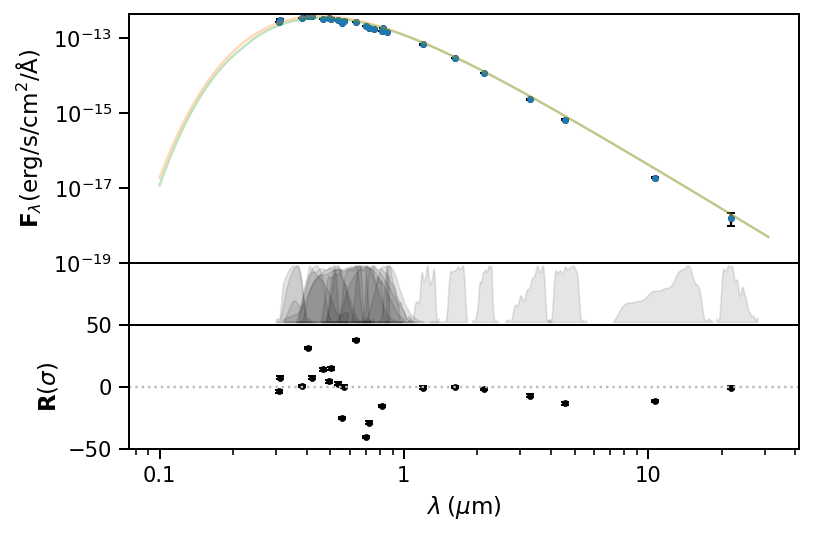

In [104]:
fig, axes = plt.subplots(3, 1, gridspec_kw={'height_ratios': [4, 1, 2]}, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
axes[0].plot(df_vosa['wl_means'], df_vosa['Obs.Flux'], '.')
axes[0].errorbar(df_vosa['wl_means'], df_vosa['Obs.Flux'].values, yerr=df_vosa['Obs.Error'].values, 
             fmt='.', color='k', zorder=-1, barsabove=True, capsize=2)
axes[0].plot(wav, bb_flux, '-', alpha=0.3)
axes[0].plot(wav, spec_ext, '-', alpha=0.3)
axes[0].set_ylim(1e-19)
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_ylabel('$\mathbf{F}_\lambda (\mathrm{erg/s/cm^2/\AA})$')

for filt in filters:
    if filt is not None:
        trans = (filt.transmittance/filt.transmittance.max())
        axes[1].fill_between(filt.wavelength.value, trans, color='k', alpha=0.1)
axes[1].set_yticklabels([])
axes[1].set_yticks([])

resid = df_vosa['Obs.Flux'].values-flux_means
err = df_vosa['Obs.Error'].values
axes[2].errorbar(df_vosa['wl_means'].values, resid/err, yerr=err/err, 
             fmt='.', color='k', zorder=-1, barsabove=True, capsize=2)

axes[2].axhline(0, linestyle='dotted', color='#b2bec3')
axes[2].set_ylim(-50, +50)
axes[2].set_ylabel('$\mathbf{R} (\sigma)$');
axes[2].set_xticks((1e3, 1e4, 1e5))
axes[2].set_xticklabels((0.1, 1, 10))
axes[2].set_xlabel('$\lambda\;(\mu\mathrm{m})$');
plt.savefig('../../paper/paper1/figures/SED_simple.png', bbox_inches='tight', dpi=300)

Plausible!

In [ ]:
new_Rstar = R_star*1.087

In [ ]:
L_star = const.sigma_sb * 4*np.pi*new_Rstar**2 * (6306*u.Kelvin) **4

In [ ]:
L_star.to(u.Lsun)

In [ ]:
L_star.to(u.Lsun)

# Download all Tynt filters...